# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

c:\Users\muggs\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\muggs\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\muggs\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Communication and customer s...
1,✅ Trip Verified | That was supposed to be my ...
2,✅ Trip Verified | Have no fear when your BA f...
3,Not Verified | We have flown BA five times fr...
4,✅ Trip Verified | London Heathrow to Istanbul...


In [5]:
import os

# Create the 'data' directory if it doesn't exist
if not os.path.exists("data"):
    os.makedirs("data")


In [6]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df

,reviews
0,✅ Trip Verified | Communication and customer s...
1,✅ Trip Verified | That was supposed to be my ...
2,✅ Trip Verified | Have no fear when your BA f...
3,Not Verified | We have flown BA five times fr...
4,✅ Trip Verified | London Heathrow to Istanbul...
...,...
995,✅ Trip Verified | Tampa to Gatwick. I paid to...
996,✅ Trip Verified | London Heathrow to Madrid. I...
997,✅ Trip Verified | Gatwick to St Lucia return....
998,✅ Trip Verified | It's been many years since ...


removing the '|' 

In [10]:
df.reviews = df.reviews.str.split('|', expand=True)[1]

In [11]:
df

,reviews
0,Communication and customer service non existe...
1,That was supposed to be my flight but it was...
2,Have no fear when your BA flight is operated...
3,We have flown BA five times from western USA...
4,London Heathrow to Istanbul at the start of ...
...,...
995,Tampa to Gatwick. I paid to have my seats bu...
996,London Heathrow to Madrid. I travel from LHR ...
997,Gatwick to St Lucia return. Recently returne...
998,It's been many years since I flew long haul ...


Without using ML

Step 1: Cleaning of the text

In [13]:
import re

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['clean_reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,clean_reviews
0,Communication and customer service non existe...,Communication and customer service non existe...
1,That was supposed to be my flight but it was...,That was supposed to be my flight but it was ...
2,Have no fear when your BA flight is operated...,Have no fear when your BA flight is operated ...
3,We have flown BA five times from western USA...,We have flown BA five times from western USA ...
4,London Heathrow to Istanbul at the start of ...,London Heathrow to Istanbul at the start of t...


Step 2: Tokenization

In [14]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muggs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muggs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muggs\AppData\Roaming\nltk_data...


In [16]:

#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['clean_reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\muggs\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\muggs\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,clean_reviews,POS tagged
0,Communication and customer service non existe...,Communication and customer service non existe...,"[(Communication, n), (customer, n), (service, ..."
1,That was supposed to be my flight but it was...,That was supposed to be my flight but it was ...,"[(supposed, v), (flight, n), (cancelled, v), (..."
2,Have no fear when your BA flight is operated...,Have no fear when your BA flight is operated ...,"[(fear, n), (BA, n), (flight, n), (operated, v..."
3,We have flown BA five times from western USA...,We have flown BA five times from western USA ...,"[(flown, v), (BA, n), (five, None), (times, n)..."
4,London Heathrow to Istanbul at the start of ...,London Heathrow to Istanbul at the start of t...,"[(London, n), (Heathrow, n), (Istanbul, n), (s..."


Stem words

In [17]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,clean_reviews,POS tagged,Lemma
0,Communication and customer service non existe...,Communication and customer service non existe...,"[(Communication, n), (customer, n), (service, ...",Communication customer service non existent ...
1,That was supposed to be my flight but it was...,That was supposed to be my flight but it was ...,"[(supposed, v), (flight, n), (cancelled, v), (...",suppose flight cancel hour takeoff nearly mo...
2,Have no fear when your BA flight is operated...,Have no fear when your BA flight is operated ...,"[(fear, n), (BA, n), (flight, n), (operated, v...",fear BA flight operate Finnair business clas...
3,We have flown BA five times from western USA...,We have flown BA five times from western USA ...,"[(flown, v), (BA, n), (five, None), (times, n)...",fly BA five time western USA England Always ...
4,London Heathrow to Istanbul at the start of ...,London Heathrow to Istanbul at the start of t...,"[(London, n), (Heathrow, n), (Istanbul, n), (s...",London Heathrow Istanbul start half term sch...


In [18]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Communication and customer service non existe...,Communication customer service non existent ...
1,That was supposed to be my flight but it was...,suppose flight cancel hour takeoff nearly mo...
2,Have no fear when your BA flight is operated...,fear BA flight operate Finnair business clas...
3,We have flown BA five times from western USA...,fly BA five time western USA England Always ...
4,London Heathrow to Istanbul at the start of ...,London Heathrow Istanbul start half term sch...
...,...,...
995,Tampa to Gatwick. I paid to have my seats bu...,Tampa Gatwick pay seat bump business class g...
996,London Heathrow to Madrid. I travel from LHR ...,London Heathrow Madrid travel LHR regularly ...
997,Gatwick to St Lucia return. Recently returne...,Gatwick St Lucia return Recently return two ...
998,It's been many years since I flew long haul ...,many year since fly long haul British Airway...


Sentiment Analysis

In [19]:
!pip install vaderSentiment

                                              0.0/126.0 kB ? eta -:--:--
     -------------------------------------- 126.0/126.0 kB 7.2 MB/s eta 0:00:00


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['compound']
df['Sentiment'] = df['Lemma'].apply(sentiment_analyzer_scores)

def vader_analyse(compound):
    if compound >= 0.05:
        return 'Positive'
    elif (compound > -0.05) and (compound < 0.05):
        return 'Neutral'
    else:
        return 'Negative'
    
df['Analysis'] = df['Sentiment'].apply(vader_analyse)
df.head()

,reviews,clean_reviews,POS tagged,Lemma,Sentiment,Analysis
0,Communication and customer service non existe...,Communication and customer service non existe...,"[(Communication, n), (customer, n), (service, ...",Communication customer service non existent ...,-0.9112,Negative
1,That was supposed to be my flight but it was...,That was supposed to be my flight but it was ...,"[(supposed, v), (flight, n), (cancelled, v), (...",suppose flight cancel hour takeoff nearly mo...,-0.7003,Negative
2,Have no fear when your BA flight is operated...,Have no fear when your BA flight is operated ...,"[(fear, n), (BA, n), (flight, n), (operated, v...",fear BA flight operate Finnair business clas...,0.6124,Positive
3,We have flown BA five times from western USA...,We have flown BA five times from western USA ...,"[(flown, v), (BA, n), (five, None), (times, n)...",fly BA five time western USA England Always ...,-0.1491,Negative
4,London Heathrow to Istanbul at the start of ...,London Heathrow to Istanbul at the start of t...,"[(London, n), (Heathrow, n), (Istanbul, n), (s...",London Heathrow Istanbul start half term sch...,0.7620,Positive


In [22]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    582
Negative    406
Neutral      12
Name: Analysis, dtype: int64

Visualise

([<matplotlib.patches.Wedge at 0x20ff563f910>,
 [Text(-0.28024785561609833, 1.0637016214251902, 'Positive'),
  Text(0.23995764192312266, -1.0735084210581185, 'Negative'),
  Text(1.3490407898345809, -0.05088169968161623, 'Neutral')],
 [Text(-0.15286246669968998, 0.5802008844137401, '58.2%'),
  Text(0.13088598650352143, -0.5855500478498827, '40.6%'),
  Text(0.8493960528588103, -0.03203662572546207, '1.2%')])

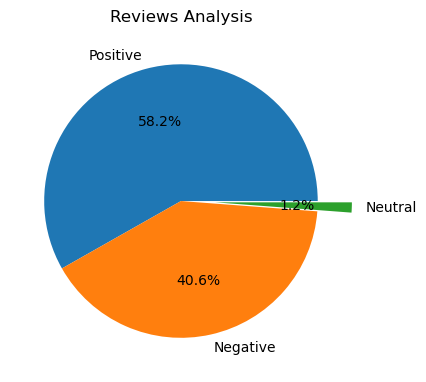

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

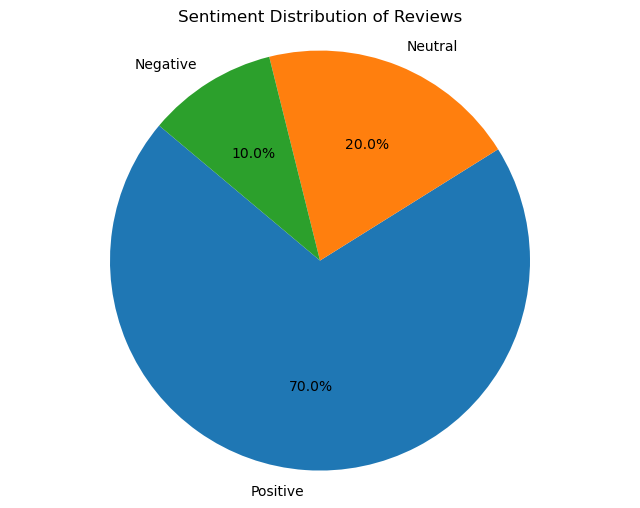

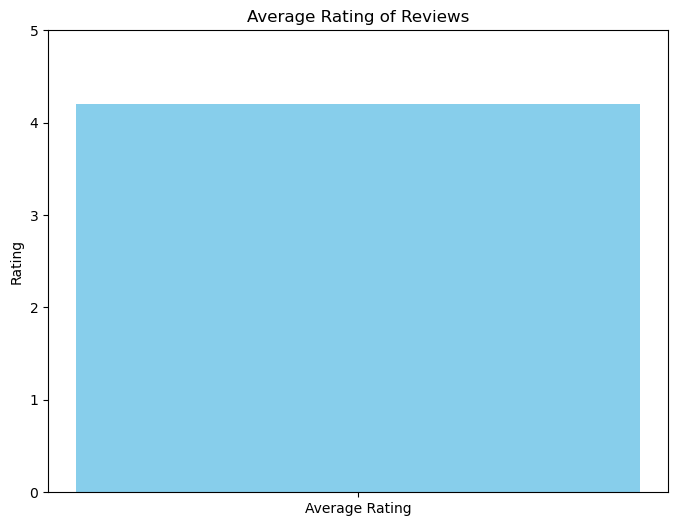

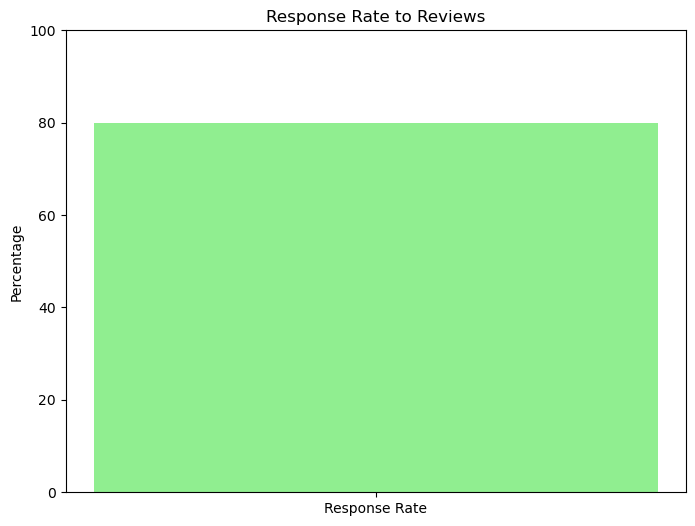

In [25]:

# Sample data for demonstration
average_rating = 4.2
sentiment_distribution = {'Positive': 70, 'Neutral': 20, 'Negative': 10}
response_rate = 80  # Percentage
# Sample data for demonstration ends
# Pie chart for sentiment distribution
labels = sentiment_distribution.keys()
sizes = sentiment_distribution.values()
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Reviews')
plt.axis('equal')
plt.show()

# Plot average rating
plt.figure(figsize=(8, 6))
plt.bar(['Average Rating'], [average_rating], color='skyblue')
plt.title('Average Rating of Reviews')
plt.ylim(0, 5)  # Assuming rating scale from 0 to 5
plt.ylabel('Rating')
plt.show()

# Plot response rate
plt.figure(figsize=(8, 6))
plt.bar(['Response Rate'], [response_rate], color='lightgreen')
plt.title('Response Rate to Reviews')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()